<a href="https://colab.research.google.com/github/AlbertoEscrivaCastro/03MIAR_04_B_2023-24_Algoritmos-de-Optimizacion/blob/main/Alberto_Escriv%C3%A1_Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG2 - Actividad Guiada 2
Nombre: Alberto Manuel Escrivá Castro <br>
Link:   https://drive.google.com/file/d/18sWPQoQGdalH15aX4h6GKjUogpDgrJGJ/view?usp=sharing <br>
Github: https://github.com/AlbertoEscrivaCastro/03MIAR_04_B_2023-24_Algoritmos-de-Optimizacion/blob/main/Alberto_Escriv%C3%A1_Algoritmos_AG2.ipynb<br>

In [ ]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

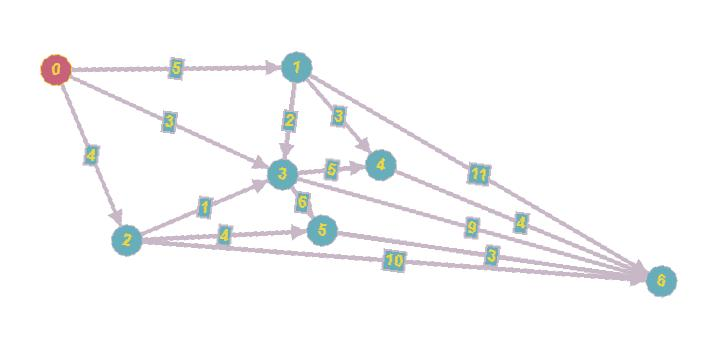

* Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
* Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima (modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

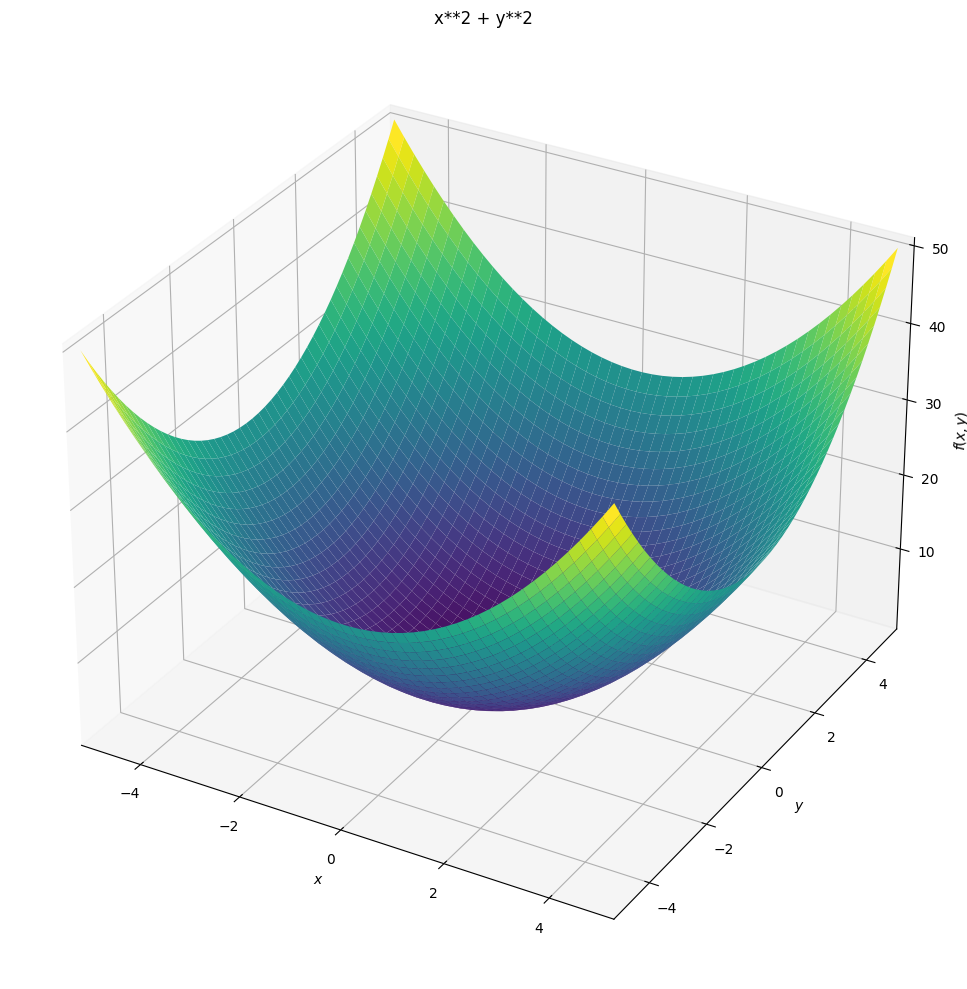

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

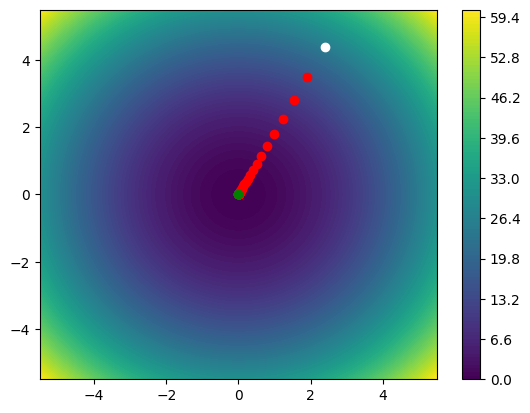

Solucion: [3.40309923775241e-05, 6.244347993866258e-05] 5.05729662904926e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


In [ ]:
Z

array([[60.5       , 59.29012346, 58.10493827, ..., 58.10493827,
        59.29012346, 60.5       ],
       [59.29012346, 58.08024691, 56.89506173, ..., 56.89506173,
        58.08024691, 59.29012346],
       [58.10493827, 56.89506173, 55.70987654, ..., 55.70987654,
        56.89506173, 58.10493827],
       ...,
       [58.10493827, 56.89506173, 55.70987654, ..., 55.70987654,
        56.89506173, 58.10493827],
       [59.29012346, 58.08024691, 56.89506173, ..., 56.89506173,
        58.08024691, 59.29012346],
       [60.5       , 59.29012346, 58.10493827, ..., 58.10493827,
        59.29012346, 60.5       ]])

## Reto

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
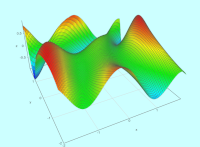


In [ ]:
import math
import numpy as np
import sympy as sym

In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Por comodidad, se implementará la función de forma simbólica ya que permite el cálculo
# automático de las derivadas.
x , y = symbols( 'x y' )
f_sym = sym.sin(1/2 * x**2 - 1/4 * y**2 + 3) *sym.cos(2*x + 1 - sym.exp(y) )
display(f_sym)


sin(0.5*x**2 - 0.25*y**2 + 3)*cos(2*x - exp(y) + 1)

In [ ]:
def grad_f( funcion , X ):
  # Para generalizar esta función, se pondrá de entrada la función polinómica, de la que
  # se calculará el gradiente, en formato simbólico en vez del punto en el que se evaluará.
  # Los valores del punto deben estar en el mismo orden que la lista de variables que se genera.
  # Alfabéticamente por nombre de variable.

  # Las variables sobre las que derivar se obtienen de entrada para que se obtengan
  # posiciones cero para variables que se hayan perdido en derivadas anteriores
  # pues también hand e tenerse en cuenta.
  try   : _ = iter( X )
  except: X = [ X ]
  X         = sym.Array( X )

  # Ya con todas las variables implicadas, se obtienen las derivadas de cada componente
  # en función de cada una de las variables.
  gradiente = []

  for j, xj in enumerate( X ):
    df_dxj  = funcion.diff( xj )

    gradiente.append( df_dxj )

  return sym.Array( gradiente )

In [ ]:
def evalua_list_func( funcion , punto , X ):
  try   : _       = iter( punto )
  except: punto   = [ punto ]
  punto           = sym.Array( punto )

  # Se convierten los nombres de variables en strings.
  X_str           = list()

  for variable in X:
    X_str.append( str( variable ) )

  X_str.sort()
  Xn              = dict(zip( X_str , punto ))
  funcion_Xn    = np.zeros( funcion.shape , dtype = float )

  for i , func_i in enumerate( funcion ):
    funcion_Xn[i] = func_i.subs( Xn )

  return np.array( funcion_Xn ) , Xn

In [ ]:
def grad_desc( funcion , Xn , gamma , tol , maxit ):
  # En caso de que el punto inicial no venga definido en un array se convierte en uno.
  try   : _       = iter( Xn )
  except: Xn      = [ Xn ]
  Xn              = sym.Array( Xn )

  # Primero se obtienen todas las variables de todas las componentes de la función y se ordenan.
  X               = list( funcion.free_symbols )
  X.sort( key = lambda xi: xi.name)

  # Se calcula el gradietne de forma simbólica, una única vez para que valga para todas
  # las iteraciones.
  gradiente       = grad_f( funcion , X )
  # display(gradiente)

  # Se inicializa el paso de forma que la primera vez siemproe sea mayor que la tolerancia buscada.
  paso            = 2 * tol
  iteraciones     = 0

  while paso >= tol and iteraciones <= maxit:
    iteraciones += 1

    gradiente_Xn , Xn_dict = evalua_list_func( gradiente , Xn , X )
    variacion     = gamma * gradiente_Xn
    Xn            = Xn - variacion
    plt.plot(Xn[0],Xn[1],"o",c="red")

    try:
      paso        = np.linalg.norm( variacion )
    except:
      paso        = abs( variacion )

  if paso > tol:
    print(f"Se ha alcanzado el límite máximo de iteraciones permitido.\nEl valor obtenido es {Xn_dict}.")
  else:
    print(f"Tras {iteraciones} iteraciones se ha obtenido el resultado {Xn_dict}.")

  return Xn_dict

In [ ]:
# Se definen los parámetros de la ejecución del algoritmo y se ejecuta.
# Generamos un punto aleatorio inicial
X0    = [ np.random.uniform( -5 , 5  ) , np.random.uniform( -5 , 5 ) ]
gamma = 0.1
tol   = 1e-12
maxit = 1e5

parametros = grad_desc( f_sym , X0 , gamma , tol , maxit )

[1.0*x*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3), -0.5*y*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) + exp(y)*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)]

Tras 61 iteraciones se ha obtenido el resultado {'x': -2.02765061782846, 'y': 1.17182683635565}.


Se ha alcanzado el límite máximo de iteraciones permitido.
El valor obtenido es {'x': -1.25856467597691, 'y': -1.72824665431134}.


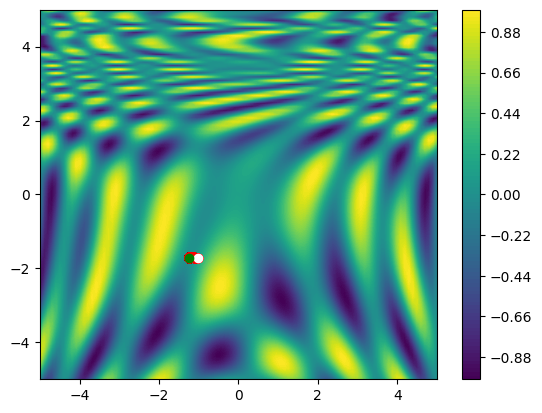

Solucion: [-1.0240186174804533, -1.732087493883033] 0.12173615108674016


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.001

#Iteraciones:50
# for _ in range(50):
  # grad = df(P)
  #print(P,grad)
  # P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  # plt.plot(P[0],P[1],"o",c="red")
min = grad_desc( f_sym , P , TA , 1e-6 , 1e3 )
plt.plot(P[0],P[1],"o",c="white")
#Dibujamos el punto final y pintamos de verde
plt.plot(min['x'],min['y'],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))
